In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'traj_1.csv'
tj = pd.read_csv(path)
tj.head()

,Vehicle Number,Vehicle Type,Time (sec),Length (m),Width (m),Long Distance (m),Long Speed (m/sec),Long Acc (m/sec2),Lat Distance (m),Lat Speed (m/sec),Lat Acc (m/sec2),Flag
0,1,1,3.0,1.8,0.6,21.824918,4.874649,-0.722183,2.351874,-0.009967,-0.105182,0
1,1,1,3.5,1.8,0.6,25.926373,4.243077,0.308803,2.292952,-0.062771,0.014188,0
2,1,1,4.0,1.8,0.6,30.411296,5.319463,1.023511,2.206669,0.037657,0.238653,0
3,1,1,4.5,1.8,0.6,35.699721,6.575488,2.213050,2.407390,0.141523,-0.147137,0
4,1,1,5.0,1.8,0.6,43.430696,7.267821,-1.793718,2.438842,-0.099596,-0.240332,0


In [3]:
tj.describe()

,Vehicle Number,Vehicle Type,Time (sec),Length (m),Width (m),Long Distance (m),Long Speed (m/sec),Long Acc (m/sec2),Lat Distance (m),Lat Speed (m/sec),Lat Acc (m/sec2),Flag
count,39.0,39.0,39.000000,3.900000e+01,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0
mean,1.0,1.0,12.500000,1.800000e+00,6.000000e-01,123.479152,5.669516,0.019409,3.041542,0.065051,0.001012,0.0
std,0.0,0.0,5.700877,4.498945e-16,2.249473e-16,62.915927,0.748016,0.956838,0.909469,0.115290,0.125758,0.0
min,1.0,1.0,3.000000,1.800000e+00,6.000000e-01,21.824918,3.526778,-2.624294,2.104038,-0.177829,-0.258008,0.0
25%,1.0,1.0,7.750000,1.800000e+00,6.000000e-01,69.943489,5.197938,-0.382358,2.331574,-0.008459,-0.101098,0.0
50%,1.0,1.0,12.500000,1.800000e+00,6.000000e-01,123.427481,5.652096,0.031692,2.660361,0.076728,0.014188,0.0
75%,1.0,1.0,17.250000,1.800000e+00,6.000000e-01,176.034540,6.098554,0.396294,3.690462,0.139336,0.077772,0.0
max,1.0,1.0,22.000000,1.800000e+00,6.000000e-01,229.066914,7.267821,2.213050,4.753152,0.338196,0.238653,0.0


In [4]:
d = tj["Long Distance (m)"]
sp = tj["Long Speed (m/sec)"]
sp = np.mean(sp)
a = tj["Long Acc (m/sec2)"]
time = tj["Time (sec)"]

In [5]:
# Initialize

z = 0 # distance measurement
x = 50  # with uncertainty (sigma/std dev) = 40
v = sp  # assuming constant velocity
# v_predict = 0
# a_current = 0
# a_predict = 0
q = 2  # process noise
p = 1600  # sigma=40, estimate variance = 40^2 = 1600
p = p + q # prediction of estimate uncertainty for next iteration
K = 0
t = 0.5
r = 2.25  # distance measurement error (sigma/std dev) = 1.5
error=[]
predictions=[]

In [6]:
def measure(i,z,d):
    z = d[i]
    return z

In [7]:
def update(K,p,r,x,z):
    
    K = p / (p + r)  # Kalman gain
    
    x = x + K * (z - x)  # Current estimate update
    
    p = p * (1 - K)  # Current estimate uncertainty update
    
    return K,x,p

In [8]:
def predict(x,v,t,p,q):
    
    x = x + v * t
    p = p + q  # Extrapolated uncertainty
    
    return x,p

In [9]:
def report(i):
    print("Iteration: ",i)
    print("Prediction: ",x)
    print("Measurement: ",z)
    print("Error: ",diff)
    print()

In [10]:
i=0
while(i<39):
    
    z = measure(i,z,d)
    diff = abs(z-x)
    predictions.append(x)
    error.append(diff)
#     report(i)
    
    K,x,p = update(K,p,r,x,z)
    x,p = predict(x,v,t,p,q)
    
    i=i+1

In [11]:
print(len(predictions))

39


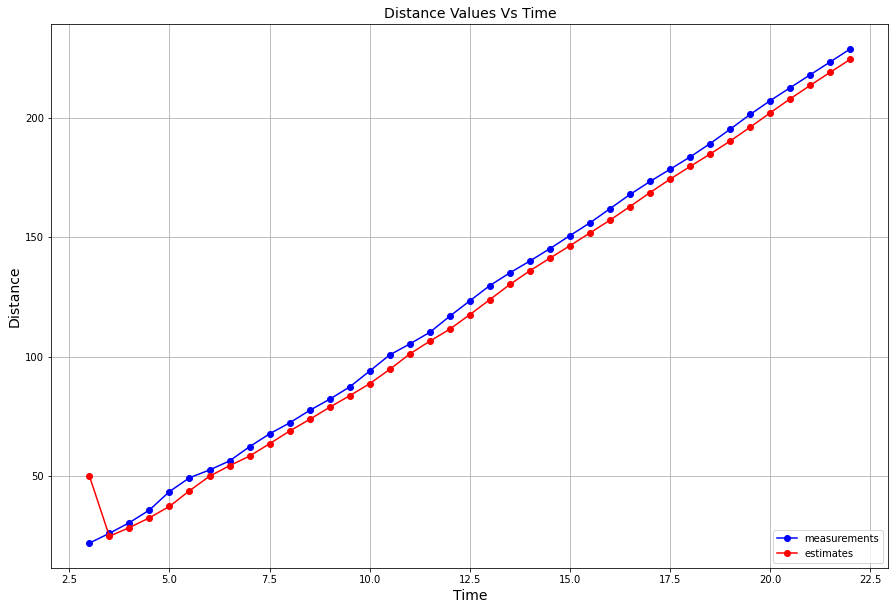

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(time, d, color='blue', marker='o')
plt.plot(time, predictions, color='red', marker='o')
plt.legend(['measurements', 'estimates'], loc='lower right')
plt.title('Distance Values Vs Time', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.grid(True)
plt.show()

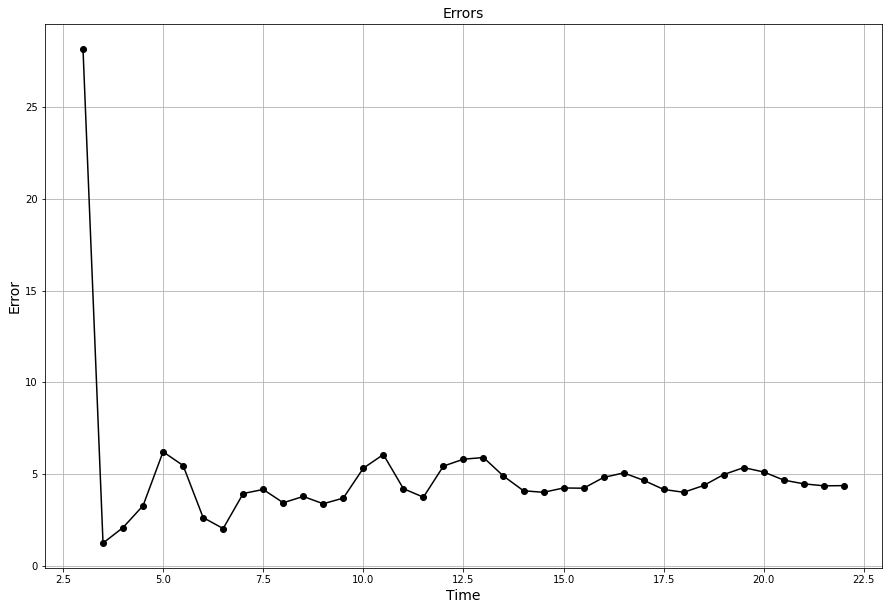

In [13]:
plt.figure(figsize=(15, 10))
plt.plot(time, error, color='black', marker='o')
plt.title('Errors', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.grid(True)
plt.show()